## Bayes Thereom


In [ ]:
# Assigning numbers to the data

# outlook
# rainy = 0, overcast = 1, sunny = 2

# temperature
# hot = 0, mild = 1, cool = 2

# humidity
# normal = 0, high = 1

# windy
# false = 0, true = 1

# play golf
# no = 0, yes = 1

In [2]:
#dataset converted to integers using above notations
dataset = [
           [0,0,1,0,0],
           [0,0,1,1,0],
           [1,0,1,0,1],
           [2,1,1,0,1],
           [2,2,0,0,1],
           [2,2,0,1,0],
           [1,2,0,1,1],
           [0,1,1,0,0],
           [0,2,0,0,1],
           [2,1,0,0,1],
           [0,1,0,1,1],
           [1,1,1,1,1],
           [1,0,0,0,1],
           [2,1,1,1,0]
           ]

In [3]:
mp = dict()
for i in range(len(dataset)):
    row = dataset[i]
    y = row[-1]
    if (y not in mp):
        mp[y] = list()
    mp[y].append(row)
for label in mp:
    print(label)
    for row in mp[label]:
        print(row)

0
[0, 0, 1, 0, 0]
[0, 0, 1, 1, 0]
[2, 2, 0, 1, 0]
[0, 1, 1, 0, 0]
[2, 1, 1, 1, 0]
1
[1, 0, 1, 0, 1]
[2, 1, 1, 0, 1]
[2, 2, 0, 0, 1]
[1, 2, 0, 1, 1]
[0, 2, 0, 0, 1]
[2, 1, 0, 0, 1]
[0, 1, 0, 1, 1]
[1, 1, 1, 1, 1]
[1, 0, 0, 0, 1]


In [4]:
test = [2,1,0,1]

In [5]:
probYes = 1

count = 0
total = 0
for row in dataset:
    if(row[-1] == 1):
        count+=1
    total+=1
print("Total yes: "+str(count)+" / "+str(total))
probYes *= count/total
for i in range(len(test)):
    count = 0
    total = 0
    for row in mp[1]:
        if(test[i] == row[i]):
            count += 1
        total += 1
    print('for feature '+str(i+1))
    print(str(count)+" / "+str(total))
    probYes *= count/total

probNo = 1
count = 0
total = 0
for row in dataset:
    if(row[-1] == 0):
        count+=1
    total+=1
probNo *= count/total
print("Total no: "+str(count)+" / "+str(total))
for i in range(len(test)):
    count = 0
    total = 0
    for row in mp[0]:
        if(test[i] == row[i]):
            count += 1
        total += 1
    print('for feature '+str(i+1))
    print(str(count)+" / "+str(total))
    probNo *= count/total

Total yes: 9 / 14
for feature 1
3 / 9
for feature 2
4 / 9
for feature 3
6 / 9
for feature 4
3 / 9
Total no: 5 / 14
for feature 1
2 / 5
for feature 2
2 / 5
for feature 3
1 / 5
for feature 4
3 / 5


In [6]:
print(probYes)
print(probNo)

0.021164021164021163
0.006857142857142859


In [7]:
prob = probYes/(probYes+probNo)
print("Probability of playing golf: "+str(prob*100)+"%")

Probability of playing golf: 75.5287009063444%


## Linear Regression

In [8]:
#Air Velocity (cm/sec) 20,60,100,140,180,220,260,300,340,380

#Evaporation Coefficient(mm 2 /sec)0.18, 0.37, 0.35, 0.78, 0.56, 0.75, 1.18, 1.36, 1.17, 1.65

In [9]:
Air_vel_AND_Eva_coeff = [
                            [20,0.18],
                            [60,0.37],
                            [100,0.35],
                            [140,0.78],
                            [180,0.56],
                            [220,0.75],
                            [260,1.18],
                            [300,1.36],
                            [340,1.17],
                            [380,1.65]
                        ]

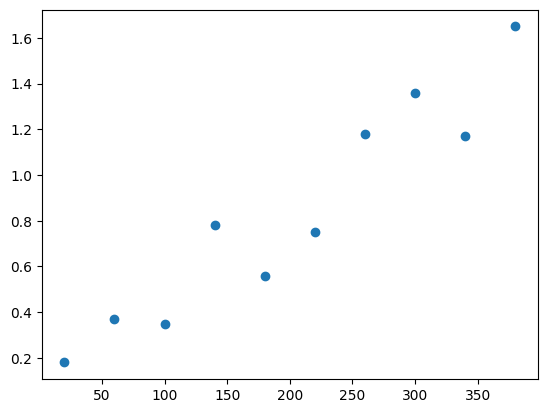

In [10]:
x = [i[0] for i in Air_vel_AND_Eva_coeff]
y = [i[1] for i in Air_vel_AND_Eva_coeff]
import matplotlib.pyplot as plt
plt.scatter(x,y)
plt.show()

In [11]:
import math

def mean(n):
    return sum(n) / float(len(n))

def covariance(x, mx, y, my):
    covar = 0.0
    for i in range(len(x)):
        covar += (x[i] - mx) * (y[i] - my)
    return covar

def variance(values, mean):
    return sum([(x-mean)**2 for x in values])

In [12]:
x_mean, y_mean = mean(x), mean(y)
w1 = covariance(x, x_mean, y, y_mean) / variance(x, x_mean)
w0 = y_mean - w1 * x_mean
print(w0)
print(w1)

0.06924242424242422
0.0038287878787878786


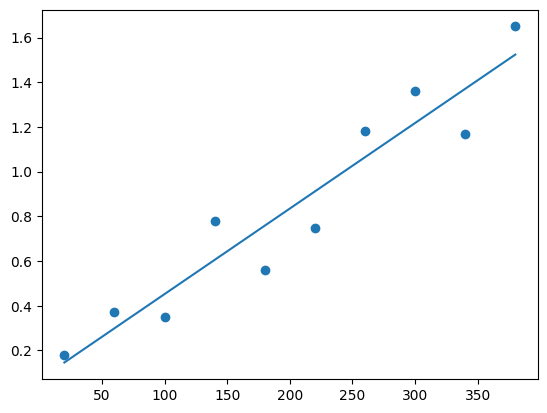

In [13]:
import numpy as np
x = np.array(x)
plt.scatter(x,y)
plt.plot(x, w0 + w1*x, linestyle='solid')
plt.show()

In [14]:
def rmse(actual, predicted):
    sum_error = 0.0
    for i in range(len(actual)):
        prediction_error = predicted[i] - actual[i]
        sum_error += (prediction_error ** 2)
    mean_error = sum_error / float(len(actual))
    return (mean_error)**0.5

yPred = [w0 + q*w1 for q in x]
print(rmse(y,yPred))

0.1422605377680705


In [15]:
print("Enter the x to classify")
test = [int(i) for i in input().split()]
yNew = w0 + w1 * test[0]
print(yNew)

Enter the x to classify
360
1.4476060606060606
